In [1]:
# 사이킷런의 KNN 분류기를 이용하여 클래스 확률을 계산해보기

# 데이터 준비
# https://bit.ly/fish_csv_data

import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
# 어떤 종류의 생선이 있는지 Species 열에서 고유한(unique) 값을 추출해보기

print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [3]:
# Species 열을 target, 나머지 다섯개 열을 입력 데이터로 활용

# Species 열을 뺀 나머지 5개 열을 numpy 배열화 시키기

fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [4]:
# 타깃 데이터도 numpy 배열화

fish_target = fish['Species'].to_numpy()

print(fish_target)

['Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish'
 'Whitefish' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki'
 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'

In [6]:
# 훈련 세트와 테스트 세트

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 43)

In [7]:
# StandardScaler 클래스를 사용해 훈련 세트와 테스트 세트를 표준화 전처리 하기

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [20]:
# KNN 분류기의 확률 예측

from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors = 3)

kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8739495798319328
0.825


- 타깃 데이터를 만들 때 fish['Species']를 사용해 만들었기 때문에 훈련 세트와 테스트 세트의 타깃 데이터에도 7개의 생선 종류가 들어있음
- 즉 이진 분류(도미냐 빙어냐)가 아닌 타깃 데이터에 2개 이상의 클래스가 포함된 다중 분류 문제
- 이진 분류에서는 양성 클래스는 1, 음성 클래스는 0으로 지정하여 타깃 데이터를 만들었었음
- 다중 분류에서도 타깃값을 숫자로 바꾸어 입력할 수 있지만 사이킷런에서는 문자열로 된 타깃값을 그대로 사용 가능
- 또한 타깃값을 문자열 그대로 사용하게 되면, 사이킷런 모델에서 자동으로 알파벳 순으로 정렬시킴
- KNeighborsClassifier에서 정렬된 타깃값은 classes_ 속성에 저장되어 있음

In [21]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


- predict() -> 타깃값(물고기명)을 예측
- predict_proba() -> 클래스별 확률값을 반환

In [24]:
# 테스트 세트에 있는 처음 5개의 샘플의 타깃값을 예측해보기

print(kn.predict(test_scaled[:5]))

['Perch' 'Perch' 'Smelt' 'Parkki' 'Perch']


In [25]:
# 테스트 세트에 있는 처음 5개의 샘플의 타깃값 확률 예측해보기

import numpy as np

proba = kn.predict_proba(test_scaled[:5])

# decimals -> 유지할 소수점 아래 자릿수를 지정
print(np.round(proba, decimals = 4))

[[0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.     0.     0.3333]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     1.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


- predict_proba()의 출력 순서는 앞서 보았던 classes_ 속성의 순서와 동일
- 즉 첫 번째 열이 'Bream'일 확률, 두 번째 열이 'Pakki'일 확률임
- 첫 번째 샘플은 3번째 열의 값이 가장 높으므로 세 번째 클래스인 'Perch'라고 예측한 것임

In [35]:
# 처음 5개의 샘플의 최근접 이웃의 클래스를 확인해 보기

distances , indexes = kn.kneighbors(test_scaled[0:5])
print(train_target[indexes])

[['Perch' 'Perch' 'Roach']
 ['Perch' 'Perch' 'Whitefish']
 ['Smelt' 'Smelt' 'Smelt']
 ['Parkki' 'Parkki' 'Parkki']
 ['Perch' 'Roach' 'Perch']]


- 이렇게 KNN 모델이 확률을 출력할 수 있지만 이웃한 샘플의 클래스 비율이므로 항상 정해진 확률만 출력
- 즉 3개의 최근접 이웃을 사용하기 때문에 가능한 확률은 0/3, 1/3, 2/3, 3/3이 전부임
- 조금 더 정밀한 확률을 출력하는 방법 -> 로지스틱 회귀

## 로지스틱 회귀(Logistic Regression)

- 이름은 회귀이지만 분류 모델
- 선형 회귀와 동일하게 선형 방정식을 학습
- z = a * (Weight) + b * (Length) + c * (Diagonal) + d * (Height) + e * (Width) + f
- a,b,c,d,e 는 가중치 혹은 계수
- 특성의 갯수는 늘어났지만 앞서 다룬 다중 회귀를 위한 선형 방정식과 같음
- 하지만 확률이 되려면 0에서 1 (또는 0에서 100%) 사이 값이 되어야 함
- z가 아주 큰 음수일 때는 0, 아주 큰 양수 일때는 1이 되도록 바꾸는 방법 = '시그모이드 함수(sigmoid function) or 로지스틱 함수('logistic function')
- z가 무한하게 큰 음수 -> 0에 가까워짐 / 무한하게 큰 양수 -> 1에 가까워짐
- z = 0 일 경우 -> 0.5

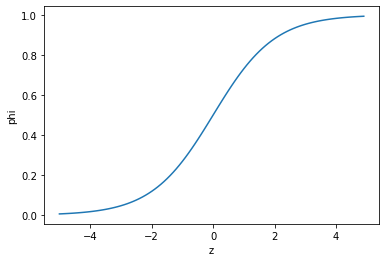

In [37]:
# numpy를 사용해 간단한 시그모이드 그래프 그리기
# -5와 5 사이에 0.1 간격으로 배열 z를 만든 다음 z 위치마다 시그모이드 함수를 계산하기
# 시그모이드 함수 식 계산은 np.exp() 함수를 사용

import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)

phi = 1 / (1+np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')

plt.show()

## 로지스틱 회귀로 이진 분류 수행하기

- 이진 분류일 경우 시그모이드 함수의 출력은 0.5보다 크면 양성 클래스, 0.5보다 작으면 음성 클래스로 판단
- 정확히 0.5일 때는 라이브러리마다  다를 수 있지만 사이킷런은 음성 클래스로 판단

In [40]:
# numpy 배열은 True, False 값을 전달하여 행을 선택할 수 있음 = boolean indexing
# 연습

char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
# 여기서 A, C만 골라내려면 첫 번째와 세 번째 원소만 True이고 나머진 False인 배열을 전달하면 됨

print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [45]:
# 이와 같은 방식으로 훈련 세트에서 도미(Bream)와 빙어(Smelt)의 행만 골라내기

bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')

train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [47]:
print(lr.classes_)

['Bream' 'Smelt']


In [42]:
# Bream과 Smelt만으로 처리한 데이터로 로지스틱 회귀 모델 훈련하기

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

# 훈련한 모델을 사용해 train_bream_smelt에 있는 처음 5개 샘플을 예측해보기
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Bream' 'Smelt' 'Bream' 'Smelt']


In [46]:
# predict_proba() 메서드로 예측 확률 출력해보기
# 처음 5개 샘플만 예측해보자

print(lr.predict_proba(train_bream_smelt[:5]))

[[0.97685673 0.02314327]
 [0.99116335 0.00883665]
 [0.02728768 0.97271232]
 [0.99069687 0.00930313]
 [0.02716287 0.97283713]]


- 이진 분류에서의 LogisticRegression 클래스의 predict_proba 메서드는 첫 번째 열을 음성 클래스. 두 번째 열을 양성 클래스로 예측
- lr.classes_에서 볼 수 있듯이 타깃값을 알파벳 순으로 정렬하였기 때문에 첫 번째 열, 즉 음성 클래스는 Bream이 된다

In [48]:
# 선형 회귀에서처럼 로지스틱 회귀가 학습한 계수를 확인해보기

print(lr.coef_, lr.intercept_)

[[-0.464379   -0.61272818 -0.68617614 -0.98219969 -0.7785446 ]] [-1.90859793]


- 따라서 위의 로지스틱 회귀 모델이 학습한 방정식은
- z = -0.464 * (Weight) - 0.612 * (Length) - 0.686 * (Diagonal) - 0.982 * (Height) - 0.777 * (Width) - 1.908

In [49]:
# LogisticRegression 모델로 z 값을 계산해보기

# train_bream_smelt의 처음 5개 샘플의 z 값을 출력해보기

decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-3.74263617 -4.7199711   3.57365298 -4.66805771  3.57836585]


- 이 z 값을 시그모이드 함수에 적용하면 print(lr.predict_proba(train_bream_smelt[:5]))에서 얻었던 동일한 확률 결괏값을 얻을 수 있음
- 파이썬의 scipy 라이브러리의 시그모이드 함수 사용
- np.exp() 메서드를 사용해 분수 계산을 하는 것보다 훨씬 편리하고 안전

In [50]:
from  scipy.special import expit

print(expit(decisions))

[0.02314327 0.00883665 0.97271232 0.00930313 0.97283713]


In [51]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.97685673 0.02314327]
 [0.99116335 0.00883665]
 [0.02728768 0.97271232]
 [0.99069687 0.00930313]
 [0.02716287 0.97283713]]


- expit(decisions)의 출력값을 보면 predict_proba() 메서드 출력의 두 번째 열의 값과 동일
- 즉 decision_function() 메서드는 항상 양성 클래스에 대한 z 값을 반환한다

## 로지스틱 회귀로 다중 분류 수행하기

- LogisticRegression 클래스는 반복적인 알고리즘을 사용
- max_iter 매개변수에서 반복 횟수를 지정하며 default = 100
- 또한 LogisticRegression은 기본적으로 릿지 회귀와 같이 계수의 제곱을 규제 = L2 규제
- 릿지 회귀에서는 alpha 매개변수로 규제의 양을 조절
- LogisticRegression에서 규제를 제어하는 매개변수는 C
- alpha와 반대로 C 값이 작을 수록 규제가 커지고 클 수록 규제가 작아짐 (default = 1)

In [52]:
lr = LogisticRegression(C = 20, max_iter = 1000)

lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.907563025210084
0.925


In [54]:
 # 테스트 세트의 처음 5개 샘플에 대한 예측 타깃을 출력해보기

print(lr.predict(test_scaled[:5]))

['Perch' 'Perch' 'Smelt' 'Parkki' 'Perch']


In [57]:
# 테스트 세트의 처음 5개 샘플에 대한 예측 확률을 출력해보기

proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 3))

[[0.    0.018 0.595 0.004 0.354 0.005 0.025]
 [0.    0.001 0.867 0.008 0.102 0.    0.022]
 [0.    0.002 0.052 0.    0.005 0.941 0.   ]
 [0.293 0.624 0.    0.    0.06  0.    0.022]
 [0.    0.051 0.605 0.001 0.306 0.013 0.024]]


In [59]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


- 5개 샘플에 대한 예측이므로 5개의 행이 출력됨
- 7개 생선에 대한 확률을 계산했으므로 7개 열이 출력됨
- 이진 분류일때는 두 개의 열만 출력됐음(음성 클래스, 양성 클래스)
- 이진 분류는 샘플마다 2개의 확률을 출력
- 다중 분류는 샘플마다 클래스 개수만큼 확률을 출력 (이 중에서 가장 높은 확률이 예측 클래스가 됨)
- 첫 번째 샘플의 예측을 보았을 때 3번 째 열의 확률값이 제일 높으므로 3번 째 생선인 Perch가 예측 클래스가 됨

In [61]:
print(lr.coef_)
print(lr.intercept_)

[[-1.12139328 -0.81159119  1.97558781  7.81538011 -0.4794991 ]
 [-1.2099972  -2.17830869 -2.82243463  7.07269853 -2.23047316]
 [ 3.47054984  5.76914339 -8.41124417 -6.24028182  4.58452047]
 [-0.15143782  3.70752477  4.01674237 -3.70300271 -1.62154912]
 [-2.2343081  -4.84658011  4.88899823 -0.81459274  1.76196685]
 [-1.11376066  1.20667093  1.1464711  -5.15618809 -4.68971739]
 [ 2.36034721 -2.84685911 -0.7941207   1.02598673  2.67475146]]
[-0.33795349 -0.76117086  2.99932981  0.07751911  2.261201   -6.61184206
  2.37291648]


- 이진 분류에서 coef_의 배열의 열은 5개 였고(특성이 5개) 행은 1개 였음
- 다중 분류에서는 행이 7개(클래스 = 생선 이름)나 됨
- 각 행의 각 열마다 z 값을 계산하여 출력하고 그 중 가장 높은 z 값을 출력하는 클래스가 예측 클래스가 되는 것
- coef_의 첫 번째 행의 계수값을 이용한 선형 방정식의 결괏값(z)을 이용하여 나온 확률값이 predict_proba() 결괏값의 첫 번째 행의 첫 번째 열의 값이 되는 것 (총 7번 반복하여 predict_proba() 의 첫 번째 행이 완성되는 것)
- 이진 분류에서는 이러한 z 값을 시그모이드 함수에 적용하여 0과 1 사이의 값으로 변환하여 확률을 구했음
- 다중 분류에서는??

### 소프트맥스 함수(softmax function)

- 다중 분류에서는 이진 분류에서 사용하였던 시그모이드 함수와 달리 소프트 맥스 함수를 사용하여 z값을 확률로 변환
- 시그모이드 함수는 하나의 선형 방정식의 출력값을 0과 1사이로 압축하고 전체 합이 1이 되도록 만듦
- 소프트맥스 함수는 여러 개의 선형 방정식의 출력값을 0과 1사이로 압축하고 전체 합이 1이 되도록 만듦
- 위의 예시에서 7개의 선형 방정식으로 z 값이 나오는데(z1부터 z7로 이름을 붙인다고 가정)
- 7개의 z값을 사용해 지수 함수 e^z1부터 e^z7까지 모두 계산하여 더한다(모두 더한 값을 e_sum이라 가정)
- e_sum = e^z1 + e^z2 + ... + e^z7
- 그 다음 e^z1부터 e^z7을 각각 e_sum으로 나누어 준 값을 모두 더해보면 1이 된다( = 확률의 모든 합은 1)

In [62]:
# decision_function() 메서드로 z1~z7까지의 값을 구함
# 그 다음 소프트맥스 함수를 사용해 확률로 바꾸어 보기

# 테스트 세트의 처음 5개 샘플 사용

decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -5.06   0.18   3.7   -1.4    3.18  -1.1    0.51]
 [ -3.39  -2.04   5.03   0.33   2.89  -4.16   1.34]
 [-12.52   1.68   4.9   -3.38   2.51   7.8   -0.98]
 [  4.79   5.54  -3.93  -3.35   3.2   -8.47   2.21]
 [ -6.     1.33   3.79  -2.7    3.11  -0.09   0.56]]


In [63]:
# scipy 의 소프트맥스 함수 이용

from scipy.special import softmax

proba = softmax(decision, axis = 1)

print(np.round(proba, decimals = 3))

[[0.    0.018 0.595 0.004 0.354 0.005 0.025]
 [0.    0.001 0.867 0.008 0.102 0.    0.022]
 [0.    0.002 0.052 0.    0.005 0.941 0.   ]
 [0.293 0.624 0.    0.    0.06  0.    0.022]
 [0.    0.051 0.605 0.001 0.306 0.013 0.024]]
